In [ ]:
## This is a series of examples demonstrating the use of the icanswim/cosmosis repo 
## for data science and machine learning projects.
## This repo is intended to be used as the boiler plate for data science and machine learning projects.
## See the icanswim/qchem repo for a demonstration of the use of this (icanswim/cosmosis) repo.

In [3]:
from model import FFNet, tv_model, IdentityModel, GPT
from learning import Learn, Selector, Metrics
from dataset import CDataset, SKDS, TVDS, ExampleDataset
from dataset import ImageDatasetStats, AsTensor, SqueezeN, DType, Pad1d, EmbedLookup, Reshape

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

import numpy as np


In [ ]:
# cosmosis blank parameters

lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
ds_param = {'train_param': {'input_dict': {'X': ['feature_1','feature_2'],
                                           'feature_3': ['feature_3']},
                            'transforms': {'feature_1': [ExampleTransform(10), AsTensor()],
                                           'feature_2': [Reshape(-1), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()]},
                            'boom': 'bang'}}

model_param = {'some_param': 128,
               'y': 'feature_3',
               'embed_param': {'feature_3': (voc,vec,padding_idx,trainable),
                               'some_param': True,
                               'flatten': True}} 
                                       
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([DS], 
              Model,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Optimizer, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=LossFunction,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=12, epochs=1, gpu=True)


In [4]:
# exploring cosmosis dataset (CDataset)

class ExampleTransform():
    def __init__(self, num):
        self.num = num
        
    def __call__(self, arr):
        return np.add(arr, self.num)


class ExampleDataset(CDataset):
    #zero is the lookup for the padding index 
    embed_lookup = {'feature_4': {'a': 1,'b': 2,'c': 3,'d': 4, '0': 0},
                    'feature_3': {'z1': 1, 'y1': 2, 'x1': 3, '0': 0},
                    'feature_6': {'e': 1, 'f': 2, 'g': 3, '0': 0}}
    
    def load_data(self, boom='bust'):
        
        datadic = {1: {'feature_1': np.asarray([.04]),
                       'feature_2': np.asarray([[.02,.03],[.04,.05]]),
                       'feature_3': np.asarray(['z1']),
                       'feature_4': np.asarray(['c','c','d']),
                       'feature_5': np.asarray([1.1]),
                       'feature_6': np.asarray(['e','f','g'])},
                   2: {'feature_1': np.asarray([.03]),
                       'feature_2': np.asarray([[.1,.2],[.3,.4]]),
                       'feature_3': np.asarray(['x1','z1','y1']),
                       'feature_4': np.asarray(['d','a','d']),
                       'feature_5': np.asarray([1.2]),
                       'feature_6': np.asarray(['f','f','g'])}}
        
        print(boom)
        return datadic
    
lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
lookup_feature_6 = ExampleDataset.embed_lookup['feature_6']
ds_param = {'train_param': {'input_dict': {
                                           'X2': ['feature_1','feature_2'], 
                                           'X3': ['feature_2'],
                                           'embed_3': ['feature_3'],
                                           'embed_4': ['feature_4'],
                                           'target': ['feature_5'],
                                            },
                            'transforms': {'feature_1': [ExampleTransform(10), Reshape((-1)), AsTensor()],
                                           'feature_2': [Reshape((-1)), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()],
                                           'feature_4': [Pad1d(5), EmbedLookup(lookup_feature_4), AsTensor()],
                                           'feature_5': [AsTensor()],
                                           'feature_6': [Pad1d(5), EmbedLookup(lookup_feature_6), AsTensor()]},
                            'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
               'X': ['X2', 'X3'],
               'y': 'target',
               'embed_param': {'embed_3': (4,8,0,False),
                               'embed_4': (5,8,0,False),
                               'flatten': True}
              }

im = IdentityModel(model_param)
print(im)
print('embedding_layer: ', im.embedding_layer)

out = im(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) # (1+4+4+5*8+5*8) = 89


bang
CDataset created...
ed[1]:  {'X2': tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500], dtype=torch.float64), 'X3': tensor([0.0200, 0.0300, 0.0400, 0.0500], dtype=torch.float64), 'embed_3': tensor([1, 0, 0, 0, 0]), 'embed_4': tensor([3, 3, 4, 0, 0]), 'target': tensor([1.1000], dtype=torch.float64)}
default weight initialization...
IdentityModel model loaded...
number of model parameters:  0
IdentityModel(
  (layers): ModuleList(
    (0): Identity()
  )
)
embedding_layer:  {'embed_3': Embedding(4, 8, padding_idx=0), 'embed_4': Embedding(5, 8, padding_idx=0)}
out:  tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500,  0.0200,  0.0300,  0.0400,
         0.0500, -0.8408,  0.8603, -1.5554, -0.8167,  0.5073, -1.1289,  0.9522,
        -2.0428,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000

In [5]:
# sklearn regression dataset wrapper (SKDS)
                            
ds_param = {'train_param': {'input_dict': {'model_input': ['X'],
                                           'y': ['y']},
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples': 100,
                                         'n_features': 5},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32'}}

sk = SKDS(**ds_param['train_param'])

sk[1]


creating scikit learn make_regression dataset...
CDataset created...


{'model_input': array([-1.4973453 ,  2.2236738 , -1.1483765 , -0.25675172, -0.6466127 ],
       dtype=float32),
 'y': array([-57.83428], dtype=float32)}

In [6]:
# sklearn classification dataset wrapper (SKDS)
ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [AsTensor()],
                                           'X': [AsTensor()]},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 1000,
                                         'n_features': 30,
                                         'n_informative': 20,
                                         'n_clusters_per_class': 3,
                                         'flip_y': 0.05,
                                         'class_sep': 0.1,
                                         'n_classes': 4}}}

sk = SKDS(**ds_param['train_param'])

print(sk[1])


creating scikit learn make_classification dataset...
CDataset created...
{'X': tensor([ -2.6770,  -1.5288,   2.9875,  -0.0183,  -2.3012,   0.3631,  -2.8129,
         -6.2883,   0.6466,  -0.1149,   0.4835,  -0.2808,   0.3573,  -0.3398,
          1.0168, -14.3982,   1.6480,  -0.9025,  -1.2444,  -1.1550,  -1.1170,
          3.5985,   2.9404,  -0.9268,   2.9438,  -0.6564,   1.4685,   6.1603,
         -4.8134,  -2.4182]), 'y': tensor([2])}


In [7]:
# torchvision image dataset wrapper (TVDS)
ds_param = {'train_param': {'input_dict': {'features': ['images'],
                                           'y': ['labels']},
                            'dataset': 'MNIST',
                            'tv_param': {'root': './data/',
                                         'train': True,
                                         'download': True,
                                         'transform': transforms.Compose([transforms.Resize(224)]),
                                         'target_transform': None}}}

tvds = TVDS(**ds_param['train_param'])
tvds[1]


creating torch vision MNIST dataset...
CDataset created...


{'image': <PIL.Image.Image image mode=L size=224x224>, 'y': 0}

In [6]:
# torchvision image dataset wrapper (TVDS) with transforms and PIL stats
ds_param={'dataset': 'MNIST',
          'tv_param': {'root': './data/',
                       'train': True,
                       'download': True,
                       'transform': transforms.Compose([transforms.Resize(224)]),
                       'target_transform': None}}

tvds = TVDS(**ds_param)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

creating torch vision MNIST dataset...
CDataset created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


creating scikit learn make_regression dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  3944961
running model on gpu...

.....................

total elapsed time: 0:00:10.719269
epoch: 4
y_pred last 10:
 tensor([[1588.7278],
        [2435.9790],
        [ 652.2065],
        [1812.4713],
        [-836.9487],
        [1605.8737],
        [-586.7548],
        [1686.5153],
        [1334.6517],
        [ 345.4351]], device='cuda:0')
y last 10:
 tensor([[1588.1101],
        [2644.5979],
        [ 626.0103],
        [1902.0166],
        [-582.3521],
        [1763.1436],
        [-411.6130],
        [1763.9760],
        [1390.7600],
        [ 431.3998]], device='cuda:0')
train loss: 23046.704459277702, val loss: 22504.345753636855
lr: 0.01

.....................

total elapsed time: 0:00:21.610211
epoch: 9
y_pred last 10:
 tensor([[ -162.8247],
        [ 1735.8730],
        [  133.3161],
        [  926.6324],
    

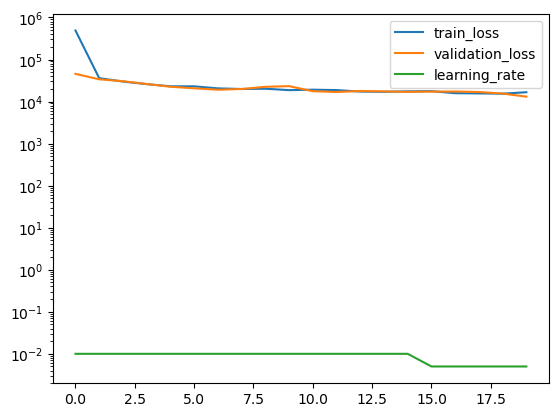

In [8]:
# sklearn regression dataset wrapper (SKDS) with sklearn metrics (Metrics) and cosmosis model (FFNet) 

model_param = {'in_channels': 1024, 
                'hidden': 1024, 
                'out_channels': 1, 
                'model_name': 'funnel',
                'activation': 'GELU'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32',
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples':200000,
                                         'n_features': 1024,
                                         'n_informative': 800}}}
             
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .00125} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 3,
               'cooldown': 3}

learn = Learn([SKDS], 
              FFNet,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=MSELoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=512, epochs=20, gpu=True)


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
running model on gpu...
compiling model...

.....................

total elapsed time: 0:00:30.925357
epoch: 5
y_pred last 10:
 tensor([[ 0.8513,  0.6265,  2.0972, -0.3193],
        [-0.0273,  0.7555,  0.3159,  0.9109],
        [ 2.0618, -0.9645,  1.8582, -1.2544],
        [-0.3819,  0.7784,  0.3028,  0.7241],
        [-1.6170,  2.3971, -0.4098,  2.9272],
        [-0.6077,  0.9084,  0.0435,  0.9474],
        [ 1.0724, -0.4825,  0.9339, -0.4837],
        [ 0.2454,  0.2381,  0.8926, -0.0946],
        [-1.9537,  1.8265, -0.3503,  1.6690],
        [ 1.1090, -2.0303,  0.5012, -1.7693]], device='cuda:0')
y last 10:
 tensor([1, 3, 0, 1, 1, 3, 2, 1, 1, 0], device='cuda:0')
train loss: 0.008953112445348676, val loss: 0.008876162087624399
lr: 0.01
accuracy_score train score: 0.44186412545787546, validation score: 0.45452

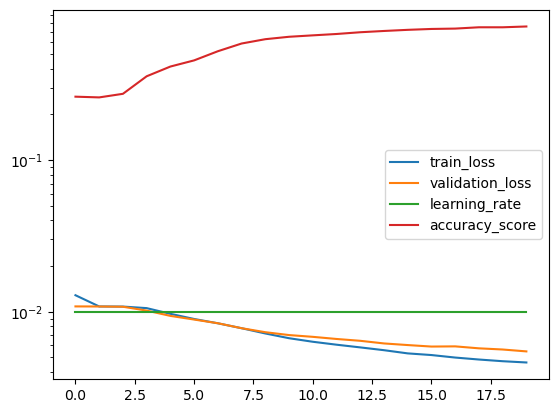

model state dict saved...
model: demo_model saved...


In [11]:
# sklearn classification dataset wrapper (SKDS) with sklearn metrics (Metrics) and cosmosis model (FFNet)
model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 300,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 30,
                 'log_plot': True,
                 'metric_name': 'accuracy_score', #sklearn
                 'metric_param': {}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learm = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              adapt=(300,256,.2), batch_size=128, epochs=20, 
              save_model='demo_model', compile_model=True)


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
running model on gpu...

.....................

total elapsed time: 0:00:30.575702
epoch: 14
y_pred last 10:
 tensor([[ 1.7985,  0.4942, -4.1513, -1.8655],
        [-1.6201, -0.5128,  1.7432,  0.9545],
        [-1.1518, -2.6840, -0.9887,  4.8603],
        [ 2.8394,  3.6909,  0.8788, -0.5282],
        [ 0.7616, -0.6095, -3.6693,  0.1778],
        [-1.0098,  0.1937,  1.5751, -0.4627],
        [ 1.4802,  1.9248, -0.4258, -0.9625],
        [-1.0561, -0.2298,  1.4077,  1.8436],
        [ 1.5505,  2.8517,  1.3606, -0.9337],
        [-0.1400, -1.0196, -1.9344,  1.8273]], device='cuda:0')
y last 10:
 tensor([0, 3, 3, 1, 2, 2, 0, 3, 1, 3], device='cuda:0')
train loss: 0.002991373714694119, val loss: 0.0033358250230807684
lr: 0.01
multiclass_accuracy train score: 0.6893601417541504, validation score: 0.6586072444915771



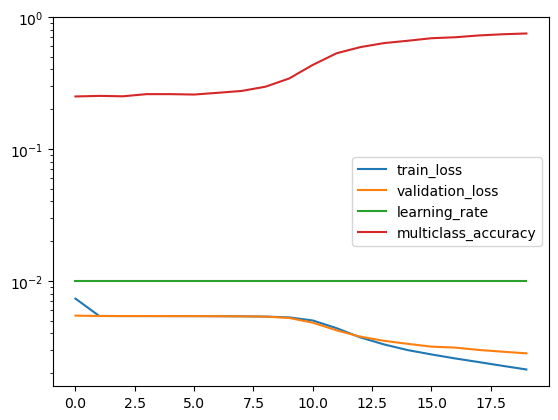

model state dict saved...
model: demo_model saved...


In [10]:
# sklearn dataset wrapper (SKDS) with torcheval metrics (Metrics) and cosmosis model (FFNet)

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 256,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 30,
                 'log_plot': True,
                 'metric_name': 'multiclass_accuracy', #torcheval
                 'metric_param': {'num_classes': 4}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              batch_size=256, epochs=20, 
              save_model='demo_model')


In [3]:
# inference with sklearn classification dataset wrapper (SKDS) and cosmosis model (FFNet)

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4, 
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 256,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=None,
              model_param=model_param, ds_param=ds_param, 
              batch_size=128, epochs=2, load_model='demo_model.pth')


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
applying _init_weights...
FFNet model loaded...
number of model parameters:  79620
model loaded from state_dict...
running model on gpu...

.....................

total learning time: 0:00:01.303343
predictions[-1]:  [ 4.0641026  -1.3316965  -0.89207697  2.2876034 ]
predictions.shape:  (100000, 4)
inference instance 2025-08-05 15:58:52.788779 complete and saved to csv...

.....................

total learning time: 0:00:02.912348
predictions[-1]:  [ 6.2497945  -0.36544695 -0.504689    1.0529709 ]
predictions.shape:  (100000, 4)
inference instance 2025-08-05 15:58:54.397784 complete and saved to csv...


creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
torch metric failed to be put on the gpu...
torchvision model resnet18 loaded...
running model on gpu...

.....................

total elapsed time: 0:00:11.211578
epoch: 1
y_pred last 10:  tensor([[ 0.8605,  3.4259, -1.2711, -0.8687, -3.1407, -1.7950, -2.0942, -0.6861,
          1.9886,  2.2707],
        [ 1.5696,  1.2263,  0.3030, -0.2997, -1.6636, -0.9094, -2.1438, -0.7123,
          1.8300,  0.9714],
        [-0.4505, -1.7581,  0.3466, -0.5675, -1.2104, -0.7020, -2.3715,  4.4348,
         -1.6470,  1.6539],
        [ 1.3312, -0.1395,  0.2980, -0.2999, -0.5964, -0.3823, -1.1384, -0.6486,
          1.6624,  0.0381],
        [ 0.5285, -0.9672,  0.3063,  0.6154, -0.3215,  0.5078, -0.3064, -0.1261,
          0.2491, -0.4251],
        [-0.4737, -0.4006, -0.1530,  0.4976, -0.3084,  0.3856, -0.1

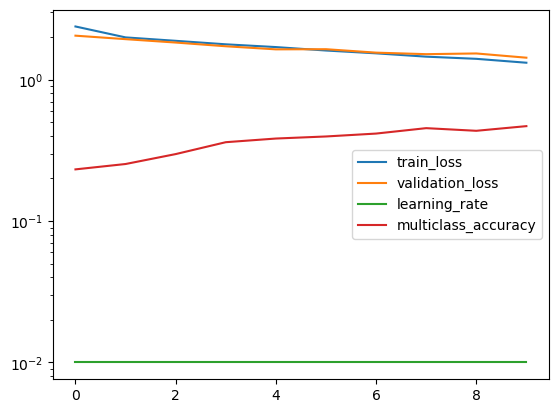

In [2]:
# cosmosis torchvision dataset wrapper (TVDS) with transforms and torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnet18',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(64),
                                                           transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                         transforms.Resize(64),
                                                         transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}}}

metrics_param = {'report_interval': 60,
                 'log_plot': True,
                 'metric_name': 'multiclass_accuracy', #torcheval
                 'metric_param': {'num_classes': 10}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 1,
               'cooldown': 1}

learn = Learn([TVDS,TVDS], 
              tv_model, 
              Selector, 
              Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
              model_param=model_param, ds_param=ds_param, sample_param=sample_param, 
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=16, epochs=10)

creating torch vision CIFAR10 dataset...
CDataset created...
creating torch vision CIFAR10 dataset...
CDataset created...
torch metric failed to be put on the gpu...
torchvision model resnext50_32x4d loaded...
running model on gpu...

.....................

total elapsed time: 0:01:00.252363
epoch: 0
y_pred last 10:  tensor([[-5.3172e-01, -3.6814e-01,  1.0455e-01,  8.8296e-02,  5.2150e-01,
          9.9168e-02, -2.2513e-02,  1.9800e-01, -5.7069e-01, -2.9196e-01],
        [-1.8095e-01,  5.3396e-01, -6.7164e-01,  4.6192e-01, -9.8953e-01,
         -3.5383e-01, -1.6335e+00,  1.9626e-01,  7.6114e-01,  1.1702e+00],
        [ 5.2293e-02, -5.4307e-02, -1.6027e-01, -2.5699e-02, -2.2569e-01,
         -5.5208e-02, -8.5709e-01, -1.1027e-01,  3.0841e-01,  4.3749e-02],
        [ 4.3414e-01,  2.8950e-01, -6.4620e-01,  3.0733e-01, -9.3058e-01,
          6.3882e-04, -1.3190e+00, -6.4599e-02,  8.9509e-01,  4.9643e-01],
        [-1.1786e+00, -7.5279e-01,  4.1674e-01,  1.8107e-01,  1.3696e+00,
          2

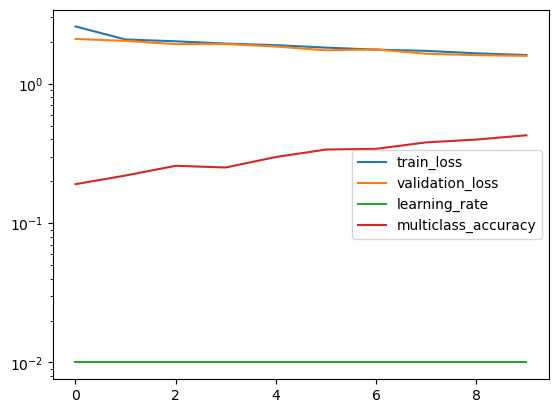

In [2]:
# cosmosis torchvision dataset wrapper (TVDS) with transforms and torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnext50_32x4d',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'transform': transforms.Compose([
                                                    transforms.RandomRotation(10),
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'transform': transforms.Compose([
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}}}

metrics_param = {'report_interval': 60,
                 'log_plot': True,
                 'metric_name': 'multiclass_accuracy', #torcheval
                 'metric_param': {'num_classes': 10}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          batch_size=16, epochs=10)